# Midterm 1 Assignment 3
## Alessandro Bucci MAT. 638619

The musical pitch of a note is determined by its fundamental frequency. The pitch played by different instruments sounds different due to harmonics, i.e. other frequencies that are superimposed and determine the timbre of the instrument. This dataset contains samples from several instruments playing different notes. Plot the spectrogram for some of them (4 instruments are sufficient) and check if it is possible to recognize the different instruments by only looking at the spectrogram. In your presentation, discuss which samples you chose to compare, how you computed the spectrogram and whether the resulting features are sufficient to recognize the instrument.

In Python you can import WAVs (and acces several other music-related functions), using the LibROSA library.


In [97]:
import matplotlib.pyplot as plt
import numpy as np

import os
import zipfile

import librosa
import librosa.display

import warnings #pysoundfile does not work, so librosa uses audioread that sends a warning
warnings.filterwarnings('ignore')

### Loading libraries

In [98]:
dataset_path = './all-samples/'
instruments = [i for i in os.listdir(dataset_path) if i.endswith('.zip')]

### Unpacking zips

After unpacked the zip file containing the folder "all-samples", the next step is to extract from all the instruments' zips the notes.

In [99]:
for instrument in instruments:
  zip_path = dataset_path+f"{instrument}"
  path_to_extract_to = zip_path[:-4]+"/"
  
  if not os.path.exists(path_to_extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
      zip_ref.extractall(path_to_extract_to)


### Plotting spectrograms

After extraction I decided to select 4 different-sounding instruments, 2 using strings, the guitar and the violin and 2 using wind, the flute and the saxophone. The note chosen were Gs5-forte, F4-forte, C4-forte and B4-forte, the main reason was about all of the instruments had these notes in common in their files. Each row of the plot will represent an instrument and each column a note.

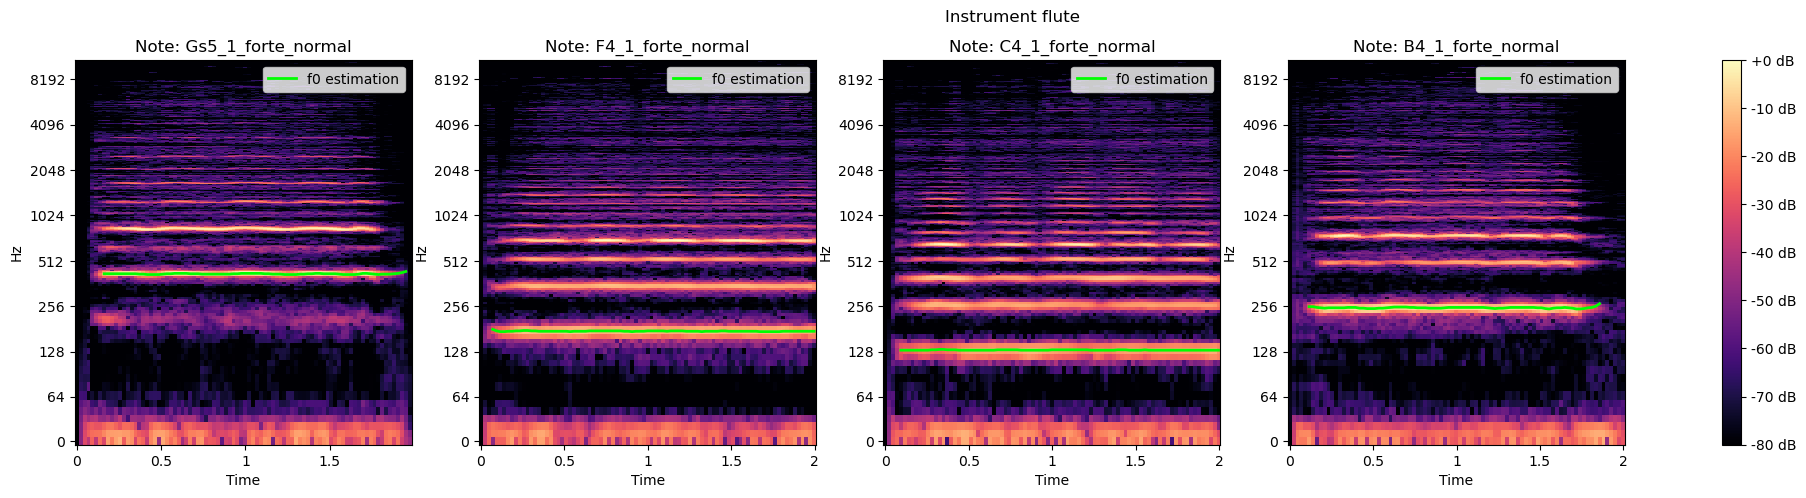

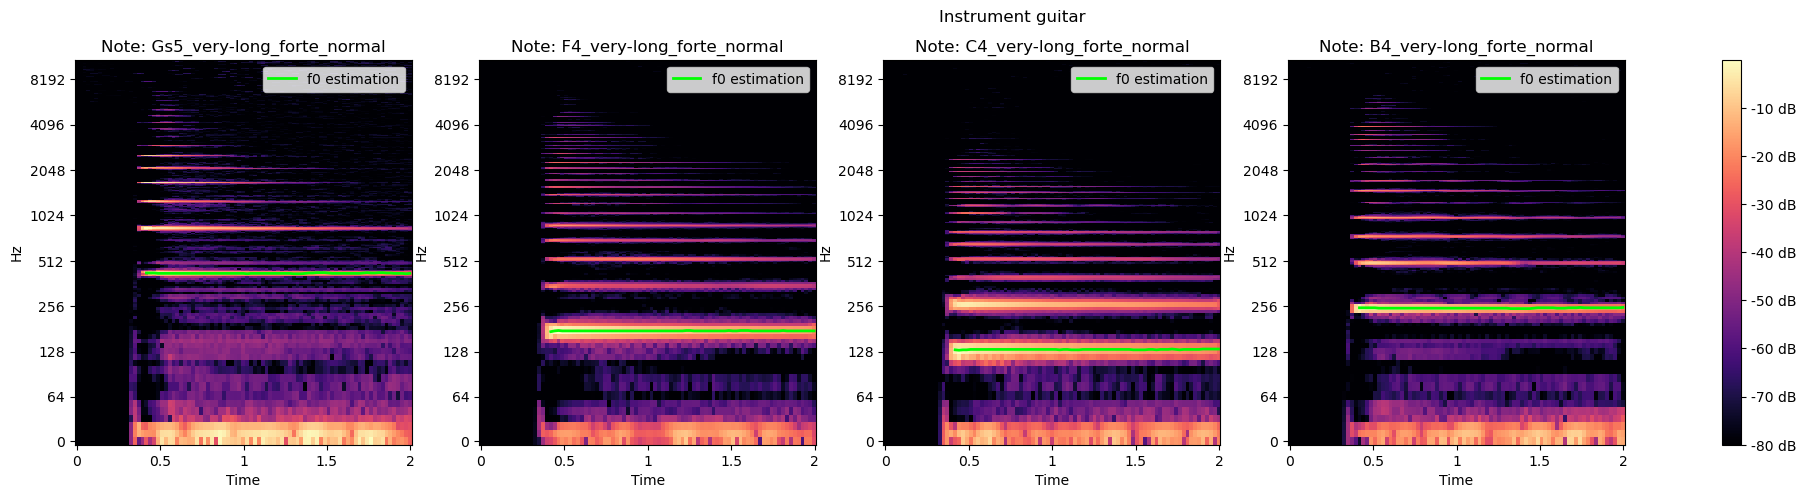

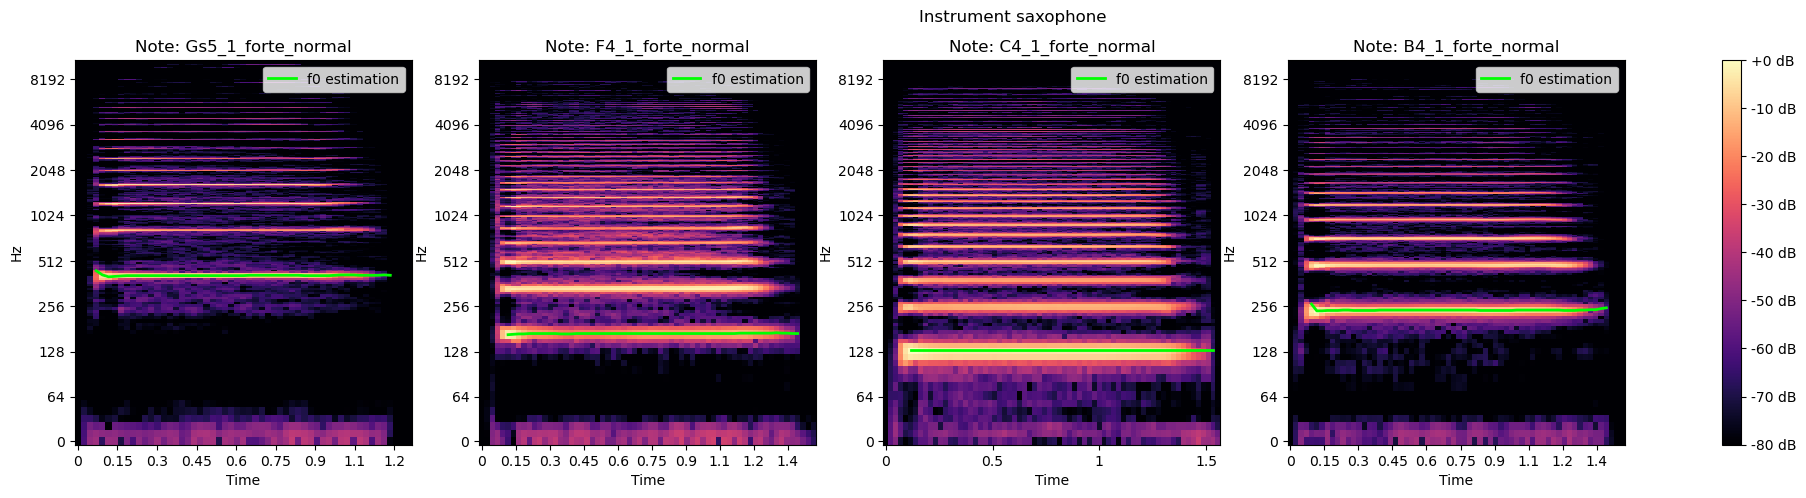

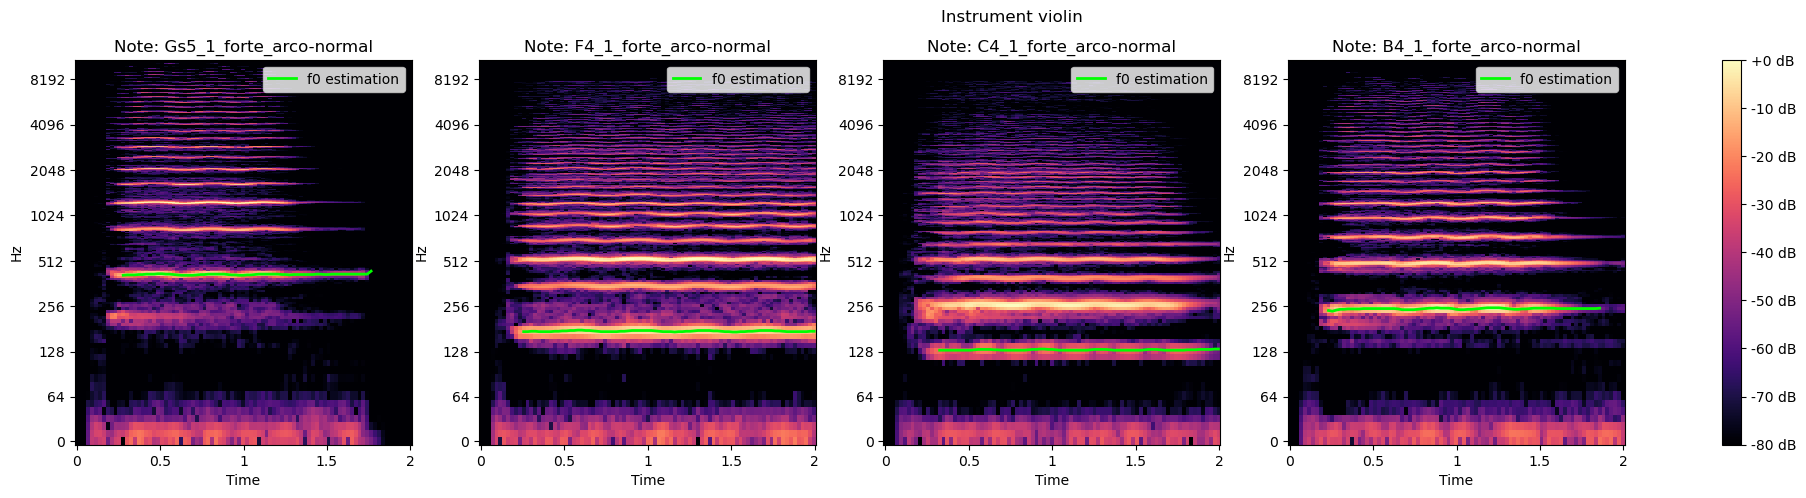

In [100]:
notes = dict()
notes["flute"] = ["Gs5_1_forte_normal","F4_1_forte_normal", "C4_1_forte_normal", "B4_1_forte_normal"] 
notes["guitar"] = ["Gs5_very-long_forte_normal","F4_very-long_forte_normal","C4_very-long_forte_normal", "B4_very-long_forte_normal"]
notes["saxophone"] = ["Gs5_1_forte_normal","F4_1_forte_normal", "C4_1_forte_normal", "B4_1_forte_normal"]
notes["violin"] = ["Gs5_1_forte_arco-normal","F4_1_forte_arco-normal","C4_1_forte_arco-normal","B4_1_forte_arco-normal"]

for instrument in notes.keys():

    fig, axs = plt.subplots(nrows=1, ncols=len(notes[instrument]), figsize=(25,5))
    fig.suptitle(f'Instrument {instrument}')

    for index, note in enumerate(notes[instrument]):
        path = dataset_path+f"{instrument}/{instrument}_{note}.mp3"
        axs[index].set_title(f'Note: {note}')
        
        signal, sr = librosa.load(path, sr= None, duration=1)
        
        # Fundamental frequency (F0) estimation using probabilistic YIN (pYIN)
        f0, voiced_flag, voiced_probs = librosa.pyin(signal, fmin=librosa.note_to_hz('C3'), fmax=librosa.note_to_hz('C6'))
        times = librosa.times_like(f0)

        # FFT of the signal
        X = librosa.stft(signal)
        n = len(X)
        
        # harmonic decomposition to remove noise (percussions) and use only harmonics (H)
        H, P = librosa.decompose.hpss(np.abs(X)**2/n)

        #Convert the power spectrogram to decibel units
        D = librosa.power_to_db(H, ref=np.max)

        #Showing the spectrogram
        img = librosa.display.specshow(D, y_axis='log', x_axis='time', ax=axs[index])
        
        
        axs[index].plot(times, f0, label='f0 estimation', color='lime', linewidth=2)
        axs[index].legend(loc='upper right')

    fig.colorbar(img, ax=axs, format="%+2.f dB")
    plt.show()




After each sound was loaded, I performed the librosa integrated function "probabilistic YIN (pYIN)" to estimate the fundamental frequency (F0). Then was performed the FFT, then the FFT was transformed to the spectral quantity of power using the formula P=abs(X)^2/n, then it was applied the harmonic decomposition to plot only the harmonics (and remove the percussions) of each note of each instrument. Finally the power spectrogram was converted to decibel units to be able to plot it using the librosa function "specshow" (y is in log scale to better see the results for the notes chosen).

The result as of the fundamental frequency f0 were as expected. F0 changes does not change from instrument to instrument but only from note to note.
We can also denote some differences between each instruments:
* Flute have intermittent higher frequencies along all the span of the audio file, its the most evident in the C4 note where frequencies higher than 512 Hz have an intermittence of less than 0.5 seconds. Even so, the f0 is stable along all the reproduction of the sound.
* Guitar's notes had the most delay of all the instruments plotted here, it can be seen that the higher frequencies of all the guitar notes are fading out almost immediately. F0 is stable.
* Saxophone's notes are the most straight of all the instruments plotted, the main diffence between guitar and saxophone's notes is the fact that the saxophone's notes do not fade out. F0 is stable.
* Every note of the violin have a slight wobble, this is reflected also in the f0 that is also slightly wobbly. The higher frequencies are fading in Gs5, C4 and B4 but not in F4, it could be a problem  of the recordings themselves. 

### Conclusions

The results computed were sufficient to recognize the instruments, although some times the difference between 2 instruments is evident, other times can be difficult if the only difference is a sligtly wobbly line (e.g. flute F4 and violin F4) some possible improvements could be to see other graphs like the power spectral density to see the distribution of the frequencies for each instrument where maybe a pattern could be found.